# Notebook pour faire des statistiques

## Chargement des données

In [1]:
import pandas
import matplotlib

In [2]:
historical = pandas.read_csv("data/historical.csv")

In [5]:
print(historical)

         stop_id                  stop_name           trip_id arrival_time  \
0           2238  La Défense (Grande Arche)  1128309950655739     13:02:00   
1           2238  La Défense (Grande Arche)  1128309950655739     13:02:00   
2           2238  La Défense (Grande Arche)  1128309950655739     13:02:00   
3           2238  La Défense (Grande Arche)  1128309950655739     13:02:00   
4           2238  La Défense (Grande Arche)  1128309950655739     13:02:00   
...          ...                        ...               ...          ...   
1144659     2317          Le Vésinet-Centre  1529194000655719     05:23:00   
1144660     2225             Chatou-Croissy  1529194000655719     05:20:00   
1144661     2225             Chatou-Croissy  1529194000655719     05:20:00   
1144662     2458            Rueil-Malmaison  1529194000655719     05:19:00   
1144663     2458            Rueil-Malmaison  1529194000655719     05:19:00   

        departure_time  stop_sequence  service_id trip_short_na

<AxesSubplot:xlabel='stop_id,date'>

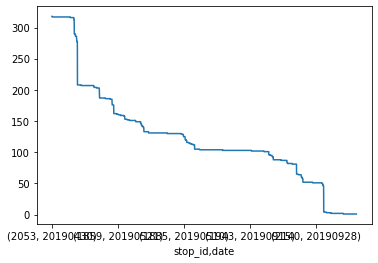

In [3]:
# nombre de passage par station par jour
count_date = historical.filter(['stop_id', 'date']).value_counts()

count_date.plot()